In [13]:
import numpy as np
import fitsio
from astropy.table import Table, join
import os
from matplotlib import pyplot as plt
from desitarget.targetmask import zwarn_mask
from desitarget import targetmask
from scipy.special import erf

In [4]:
fe = fitsio.read('/global/cfs/cdirs/desi/spectro/redux/everest/zcatalog/ztile-main-dark-cumulative.fits')

In [5]:
sel = fe['DESI_TARGET'] & targetmask.desi_mask['LRG'] > 0
print(len(fe),len(fe[sel]))

1498500 346063


In [7]:
sel &= fe['COADD_FIBERSTATUS'] == 0
fl = fe[sel]
print(len(fl))

340944


In [26]:
#redshift success criteria from Rongpu
drz = (10**(3 - 3.5*fl['Z']))
mask_bad = (drz>30) & (fl['DELTACHI2']<30)
mask_bad |= (drz<30) & (fl['DELTACHI2']<drz)
mask_bad |= (fl['DELTACHI2']<10)
wz = fl['ZWARN'] == 0
wz &= fl['Z']<1.4
wz &= (~mask_bad)


In [89]:
#set minimum/maximum TSNR2_LRG for the rest of the plots
mint = 70
maxt = 120


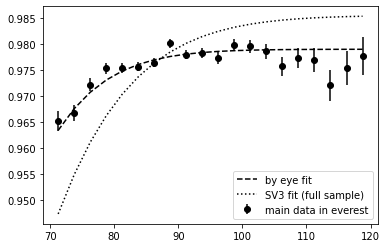

In [90]:
#look at overall z success
ntot,tb = np.histogram(fl['TSNR2_LRG'],bins=20,range=(mint,maxt))
#gz = fl['ZWARN'] == 0
gz = wz
ng,_ = np.histogram(fl[gz]['TSNR2_LRG'],bins=tb,range=(mint,maxt))
step = tb[1]-tb[0]
bl = tb[:-1]+step/2.
dl = ng/ntot
varl = dl*ntot*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/ntot#/fr

plt.errorbar(bl,ng/ntot,el,fmt='ko',label='main data in everest')
em = erf((bl-17.2)/31.7)*.979
plt.plot(bl,em,'k--',label='by eye fit')
em3 = erf((bl-13.2)/39.7)*.9855
plt.plot(bl,em3,'k:',label='SV3 fit (full sample)')
plt.legend()
plt.show()

(array([4.0100e+02, 2.2132e+04, 6.6914e+04, 9.7162e+04, 8.7824e+04,
        4.9157e+04, 1.4708e+04, 2.4120e+03, 1.6000e+02, 3.0000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ],
       dtype=float32),
 <a list of 10 Patch objects>)

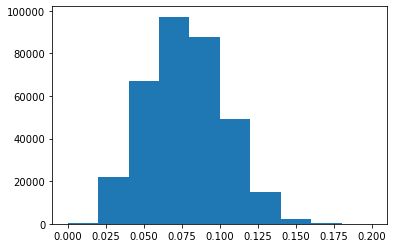

In [41]:
speed = fl['TSNR2_LRG']/fl['COADD_EXPTIME']
plt.hist(speed,range=(0,.2))

In [43]:
mds = np.median(speed)

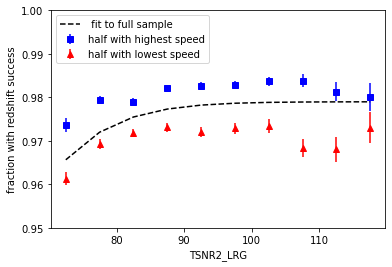

In [104]:
#split on speed
speedc = speed > mds
ntot,tb = np.histogram(fl[speedc]['TSNR2_LRG'],bins=10,range=(mint,maxt))
#gz = fl['ZWARN'] == 0
gz = wz
ng,_ = np.histogram(fl[speedc&gz]['TSNR2_LRG'],bins=tb,range=(mint,maxt))
nl,_ = np.histogram(fl[~speedc]['TSNR2_LRG'],bins=10,range=(mint,maxt))
ngl,_ = np.histogram(fl[~speedc&gz]['TSNR2_LRG'],bins=tb,range=(mint,maxt))
step = tb[1]-tb[0]
bl = tb[:-1]+step/2.
dl = ng/ntot
varl = dl*ntot*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/ntot#/fr
dll = ngl/nl
varl = dll*nl*(1.-dll) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
ell = np.sqrt(varl)/nl#/fr

plt.errorbar(bl,ng/ntot,el,fmt='bs',label='half with highest speed')
plt.errorbar(bl,ngl/nl,ell,fmt='r^',label='half with lowest speed')
em = erf((bl-17.2)/31.7)*.979
plt.plot(bl,em,'k--',label=' fit to full sample')
#em3 = erf((bl-13.2)/39.7)*.9855
#plt.plot(bl,em3,'k:',label='SV3 fit (full sample)')
plt.legend(loc='upper left')
plt.ylim(.95,1.0)
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction with redshift success')
plt.show()

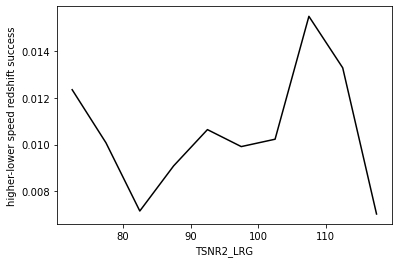

In [105]:
plt.plot(bl,ng/ntot-ngl/nl,'k-')
plt.xlabel('TSNR2_LRG')
plt.ylabel('higher-lower speed redshift success')
plt.show()

(array([53204., 98365., 95566., 48595., 23301., 11785.,  6038.,  2542.,
         1041.,   401.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ],
       dtype=float32),
 <a list of 10 Patch objects>)

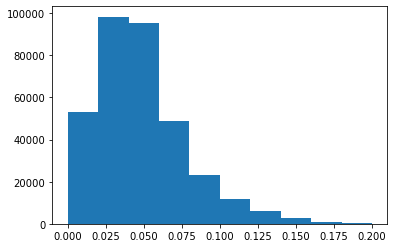

In [46]:
plt.hist(fl['EBV'],range=(0,.2))

In [47]:
ebm = np.median(fl['EBV'])
print(ebm)

0.043260083


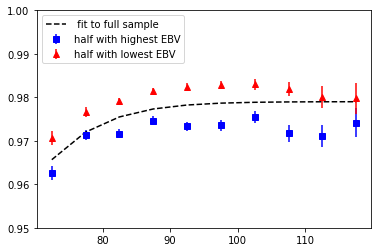

In [119]:
#split on EBV
speedc = fl['EBV'] > ebm
ntot,tb = np.histogram(fl[speedc]['TSNR2_LRG'],bins=10,range=(mint,maxt))
#gz = fl['ZWARN'] == 0
gz = wz
ng,_ = np.histogram(fl[speedc&gz]['TSNR2_LRG'],bins=tb,range=(mint,maxt))
nl,_ = np.histogram(fl[~speedc]['TSNR2_LRG'],bins=10,range=(mint,maxt))
ngl,_ = np.histogram(fl[~speedc&gz]['TSNR2_LRG'],bins=tb,range=(mint,maxt))
step = tb[1]-tb[0]
bl = tb[:-1]+step/2.
dl = ng/ntot
varl = dl*ntot*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/ntot#/fr
dll = ngl/nl
varl = dll*nl*(1.-dll) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
ell = np.sqrt(varl)/nl#/fr

plt.errorbar(bl,ng/ntot,el,fmt='bs',label='half with highest EBV')
plt.errorbar(bl,ngl/nl,ell,fmt='r^',label='half with lowest EBV')
em = erf((bl-17.2)/31.7)*.979
plt.plot(bl,em,'k--',label=' fit to full sample')
#em3 = erf((bl-13.2)/39.7)*.9855
#plt.plot(bl,em3,'k:',label='SV3 fit (full sample)')
plt.legend(loc='upper left')
plt.ylim(.95,1.0)
plt.show()


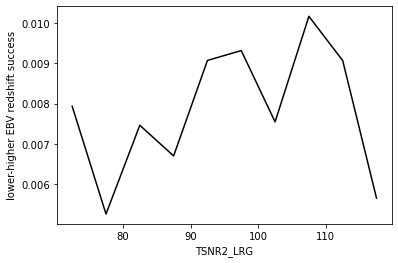

In [108]:
plt.plot(bl,ngl/nl-ng/ntot,'k-')
plt.xlabel('TSNR2_LRG')
plt.ylabel('lower-higher EBV redshift success')
plt.show()

### difference in success with EBV split pretty consistent with TSNR2, look at success rate vs EBV for high TSNR2

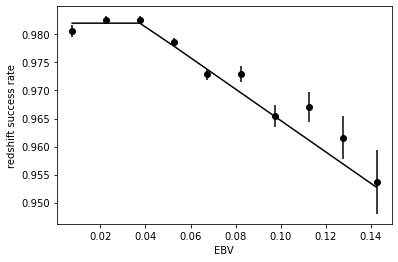

In [112]:
selht = fl['TSNR2_LRG'] > 85
ntot,tb = np.histogram(fl[selht]['EBV'],bins=10,range=(0,0.15))
#gz = fl['ZWARN'] == 0
gz = wz
ng,_ = np.histogram(fl[selht&gz]['EBV'],bins=tb)
step = tb[1]-tb[0]
bl = tb[:-1]+step/2.
dl = ng/ntot
varl = dl*ntot*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/ntot#/fr
modl = np.zeros(len(bl))
for ii in range(0,len(bl)):
    modl[ii] = ebvmod(bl[ii])
plt.errorbar(bl,ng/ntot,el,fmt='ko')
plt.plot(bl,modl,'k-')
plt.ylabel('redshift success rate')
plt.xlabel('EBV')
plt.show()


In [110]:
#fiducial parameters are just bye eye fit to above plot
#would have been more convenient if written in format that can handle arrays, but...
def ebvmod(ebv,base=.982,m=-.28):
    spl = 0.038
    if ebv < spl:
        return base
    else:
        b = base-spl*m
        return b+m*ebv

In [113]:
#make list of weights to account for EBV trend
ewl = np.zeros(len(fl))
ebvl = fl['EBV']
for ii in range(0,len(ewl)):
    ewl[ii] = .982/ebvmod(ebvl[ii])

(array([2.41785e+05, 5.18420e+04, 2.42410e+04, 1.22820e+04, 6.23400e+03,
        2.80000e+03, 1.13600e+03, 4.62000e+02, 1.33000e+02, 2.90000e+01]),
 array([1.        , 1.00586959, 1.01173917, 1.01760876, 1.02347835,
        1.02934794, 1.03521752, 1.04108711, 1.0469567 , 1.05282628,
        1.05869587]),
 <a list of 10 Patch objects>)

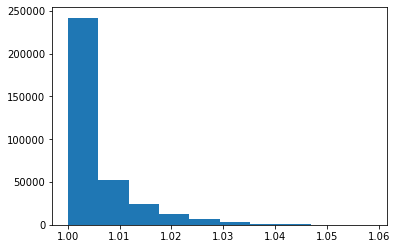

In [114]:
plt.hist(ewl)

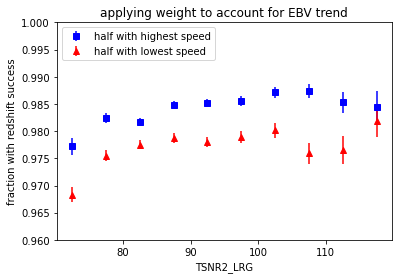

In [133]:
#split on speed again, but account expectation just from EBV
speedc = speed > mds
ntot,tb = np.histogram(fl[speedc]['TSNR2_LRG'],bins=10,range=(mint,maxt))
#gz = fl['ZWARN'] == 0
gz = wz
ng,_ = np.histogram(fl[speedc&gz]['TSNR2_LRG'],bins=tb,range=(mint,maxt),weights=ewl[speedc&gz])
nl,_ = np.histogram(fl[~speedc]['TSNR2_LRG'],bins=10,range=(mint,maxt))
ngl,_ = np.histogram(fl[~speedc&gz]['TSNR2_LRG'],bins=tb,range=(mint,maxt),weights=ewl[~speedc&gz])
step = tb[1]-tb[0]
bl = tb[:-1]+step/2.
dl = ng/ntot
varl = dl*ntot*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/ntot#/fr
dll = ngl/nl
varl = dll*nl*(1.-dll) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
ell = np.sqrt(varl)/nl#/fr

plt.errorbar(bl,ng/ntot,el,fmt='bs',label='half with highest speed')
plt.errorbar(bl,ngl/nl,ell,fmt='r^',label='half with lowest speed')
em = erf((bl-17.2)/31.7)*.979
#plt.plot(bl,em,'k--',label=' fit to full sample')
#em3 = erf((bl-13.2)/39.7)*.9855
#plt.plot(bl,em3,'k:',label='SV3 fit (full sample)')
plt.legend(loc='upper left')
plt.ylim(.96,1.0)
plt.title('applying weight to account for EBV trend')
plt.xlabel('TSNR2_LRG')
plt.ylabel('fraction with redshift success')
plt.show()

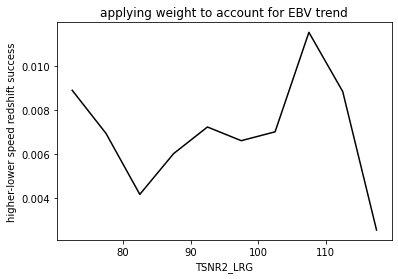

In [122]:
plt.plot(bl,ng/ntot-ngl/nl,'k-')
plt.xlabel('TSNR2_LRG')
plt.ylabel('higher-lower speed redshift success')
plt.title('applying weight to account for EBV trend')
plt.show()

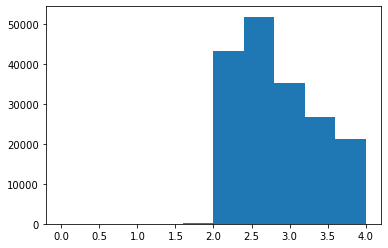

In [125]:
plt.hist(fl['FIBERFLUX_Z'],range=(0,4))
plt.show()

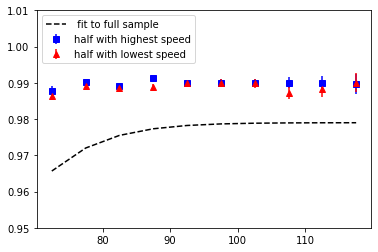

In [129]:
#split on speed again, but account expectation just from EBV
fc = fl['FIBERFLUX_Z'] > 3
speedc = speed > mds
ntot,tb = np.histogram(fl[fc&speedc]['TSNR2_LRG'],bins=10,range=(mint,maxt))
#gz = fl['ZWARN'] == 0
gz = wz
ng,_ = np.histogram(fl[fc&speedc&gz]['TSNR2_LRG'],bins=tb,range=(mint,maxt))
nl,_ = np.histogram(fl[~speedc&fc]['TSNR2_LRG'],bins=10,range=(mint,maxt))
ngl,_ = np.histogram(fl[~speedc&gz&fc]['TSNR2_LRG'],bins=tb,range=(mint,maxt))
step = tb[1]-tb[0]
bl = tb[:-1]+step/2.
dl = ng/ntot
varl = dl*ntot*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/ntot#/fr
dll = ngl/nl
varl = dll*nl*(1.-dll) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
ell = np.sqrt(varl)/nl#/fr

plt.errorbar(bl,ng/ntot,el,fmt='bs',label='half with highest speed')
plt.errorbar(bl,ngl/nl,ell,fmt='r^',label='half with lowest speed')
em = erf((bl-17.2)/31.7)*.979
plt.plot(bl,em,'k--',label=' fit to full sample')
#em3 = erf((bl-13.2)/39.7)*.9855
#plt.plot(bl,em3,'k:',label='SV3 fit (full sample)')
plt.legend(loc='upper left')
plt.ylim(.95,1.01)
#plt.title('applying weight to account for EBV trend')
plt.show()

In [130]:
len(fl[fc]),len(fl)

(226530, 340944)

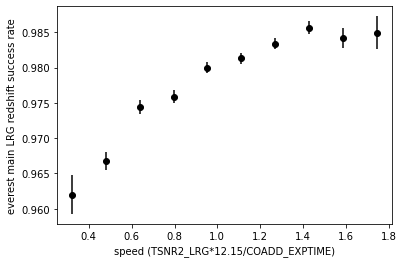

In [136]:
selht = fl['TSNR2_LRG'] > 85
ntot,tb = np.histogram(speed[selht],bins=10,range=(0.02,0.15))
#gz = fl['ZWARN'] == 0
gz = wz
ng,_ = np.histogram(speed[selht&gz],bins=tb)
step = tb[1]-tb[0]
bl = tb[:-1]+step/2.
dl = ng/ntot
varl = dl*ntot*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/ntot#/fr
modl = np.zeros(len(bl))
for ii in range(0,len(bl)):
    modl[ii] = ebvmod(bl[ii])
plt.errorbar(bl*12.15,ng/ntot,el,fmt='ko')
#plt.plot(bl,modl,'k-')
plt.ylabel('everest main LRG redshift success rate')
plt.xlabel('speed (TSNR2_LRG*12.15/COADD_EXPTIME)')
plt.show()


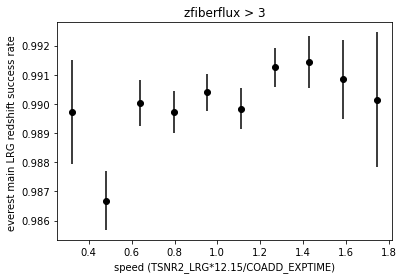

In [137]:
selht = fl['TSNR2_LRG'] > 85
ntot,tb = np.histogram(speed[selht&fc],bins=10,range=(0.02,0.15))
#gz = fl['ZWARN'] == 0
gz = wz
ng,_ = np.histogram(speed[selht&gz&fc],bins=tb)
step = tb[1]-tb[0]
bl = tb[:-1]+step/2.
dl = ng/ntot
varl = dl*ntot*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/ntot#/fr
modl = np.zeros(len(bl))
for ii in range(0,len(bl)):
    modl[ii] = ebvmod(bl[ii])
plt.errorbar(bl*12.15,ng/ntot,el,fmt='ko')
#plt.plot(bl,modl,'k-')
plt.ylabel('everest main LRG redshift success rate ')
plt.xlabel('speed (TSNR2_LRG*12.15/COADD_EXPTIME)')
plt.title('zfiberflux > 3')
plt.show()


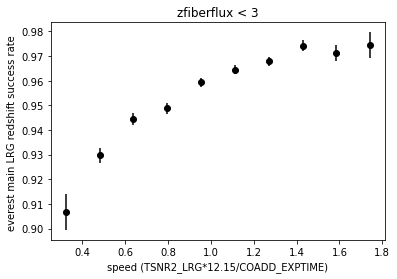

In [138]:
selht = fl['TSNR2_LRG'] > 85
ntot,tb = np.histogram(speed[selht&~fc],bins=10,range=(0.02,0.15))
#gz = fl['ZWARN'] == 0
gz = wz
ng,_ = np.histogram(speed[selht&gz&~fc],bins=tb)
step = tb[1]-tb[0]
bl = tb[:-1]+step/2.
dl = ng/ntot
varl = dl*ntot*(1.-dl) #variance for binomial distribution
wv = varl == 0
varl[wv] = 1
el = np.sqrt(varl)/ntot#/fr
modl = np.zeros(len(bl))
for ii in range(0,len(bl)):
    modl[ii] = ebvmod(bl[ii])
plt.errorbar(bl*12.15,ng/ntot,el,fmt='ko')
#plt.plot(bl,modl,'k-')
plt.ylabel('everest main LRG redshift success rate ')
plt.xlabel('speed (TSNR2_LRG*12.15/COADD_EXPTIME)')
plt.title('zfiberflux < 3')
plt.show()
